# **Artificial Neural Network**

## **Iris Dataset**

### **Import Library**

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

from IPython.display import display, HTML
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense


### **Load Dataset**

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

display(HTML(df.head().to_html()))
df.value_counts('target')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


target
0    50
1    50
2    50
Name: count, dtype: int64

### **Train-Validation-Test Split**



In [5]:
X = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

Y_train = to_categorical(Y_train, 3)
Y_val = to_categorical(Y_val, 3)
Y_test = to_categorical(Y_test, 3)

print("Contoh data label sebelum one-hot encoding:", y[:5])
print("Contoh data label setelah one-hot encoding:", Y_train[:5])


X_train (108, 4)
X_val (27, 4)
X_test (15, 4)
Contoh data label sebelum one-hot encoding: [0 0 0 0 0]
Contoh data label setelah one-hot encoding: [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### **Define and Compile Model**

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model**

In [7]:
history = model.fit(X_train,Y_train,epochs=64,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.2037 - loss: 1.0677 - val_acc: 0.5185 - val_loss: 0.9261
Epoch 2/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5000 - loss: 0.9164 - val_acc: 0.8889 - val_loss: 0.7750
Epoch 3/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7870 - loss: 0.8094 - val_acc: 1.0000 - val_loss: 0.7162
Epoch 4/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7407 - loss: 0.7303 - val_acc: 0.8889 - val_loss: 0.6058
Epoch 5/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8148 - loss: 0.6603 - val_acc: 1.0000 - val_loss: 0.5820
Epoch 6/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7407 - loss: 0.6286 - val_acc: 0.8889 - val_loss: 0.5108
Epoch 7/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8333 - loss: 0.5779 - val_acc: 1.0000 - val_loss: 0.4938
Epoch 8/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9444 - loss: 0.5477 - val_acc: 1.0000 - val_loss: 0.4729
Epoch 9/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8333 - loss:

### **Evaluation Model**

In [ ]:

loss, accuracy = model.evaluate(X_test, Y_test)

print('Akurasi Testing MLP:', accuracy)

1/1 [==============================] - 0s 27ms/step - loss: 0.1244 - acc: 1.0000
Akurasi Testing MLP: 1.0


### **Prediction**

In [ ]:
# Membuat prediksi pada data testing
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
# Membuat confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
print(cm)

1/1 [==============================] - 0s 51ms/step
[[4 0 0]
 [0 5 0]
 [0 0 6]]


### **Visualization**

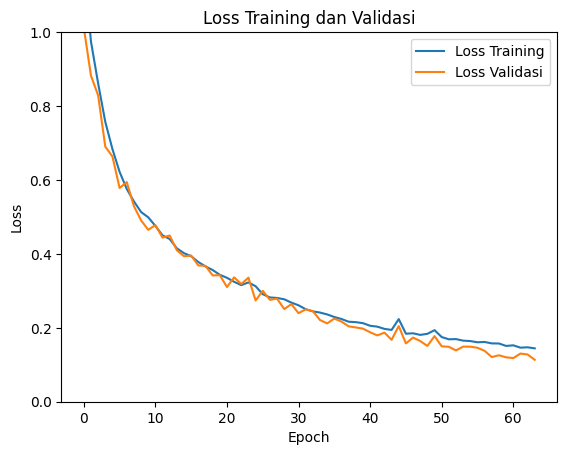

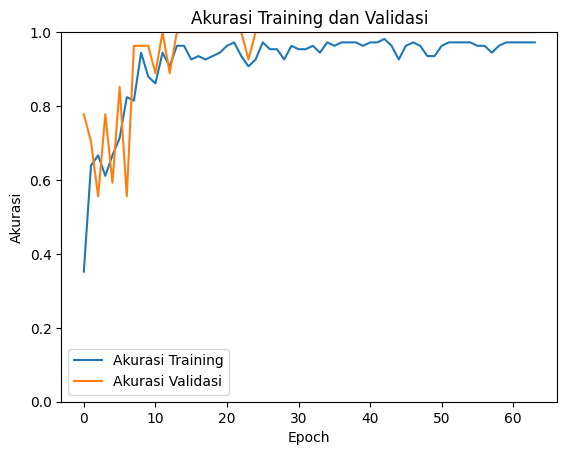

In [ ]:
# Visualisasi hasil training dan validation loss
plt.plot(history.history['loss'], label='Loss Training')  # Plot loss training
plt.plot(history.history['val_loss'], label='Loss Validasi')  # Plot loss validation
plt.title('Loss Training dan Validasi')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Loss')  # Label sumbu y
plt.ylim(0, 1)  # Mengatur batas y-axis agar lebih intuitif
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

# Visualisasi hasil training dan validation accuracy
plt.plot(history.history['acc'], label='Akurasi Training')  # Plot akurasi training
plt.plot(history.history['val_acc'], label='Akurasi Validasi')  # Plot akurasi validation
plt.title('Akurasi Training dan Validasi')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Akurasi')  # Label sumbu y
plt.ylim(0, 1)  # Mengatur batas y-axis agar lebih intuitif
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

## **MNIST Data Set**



### **Import Library**

In [ ]:
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='Akurasi Training')
plt.plot(history.history['val_acc'], label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.legend()
plt.show()


### **Load Dataset**

Dataset MNIST (Modified National Institute of Standards and Technology) adalah dataset yang berisi 70.000 gambar grayscale
dari digit tulisan tangan, dengan resolusi 28x28 piksel. Dataset ini sering digunakan sebagai benchmark dalam bidang
machine learning dan computer vision. Dataset ini terbagi menjadi dua bagian:
- Training set: 60.000 gambar
- Test set: 10.000 gambar

Setiap gambar direpresentasikan sebagai matriks 28x28 piksel, di mana setiap piksel memiliki nilai intensitas antara 0 dan 255.
Label yang menyertai gambar adalah angka digit (0-9) yang menunjukkan angka yang ditulis dalam gambar tersebut.

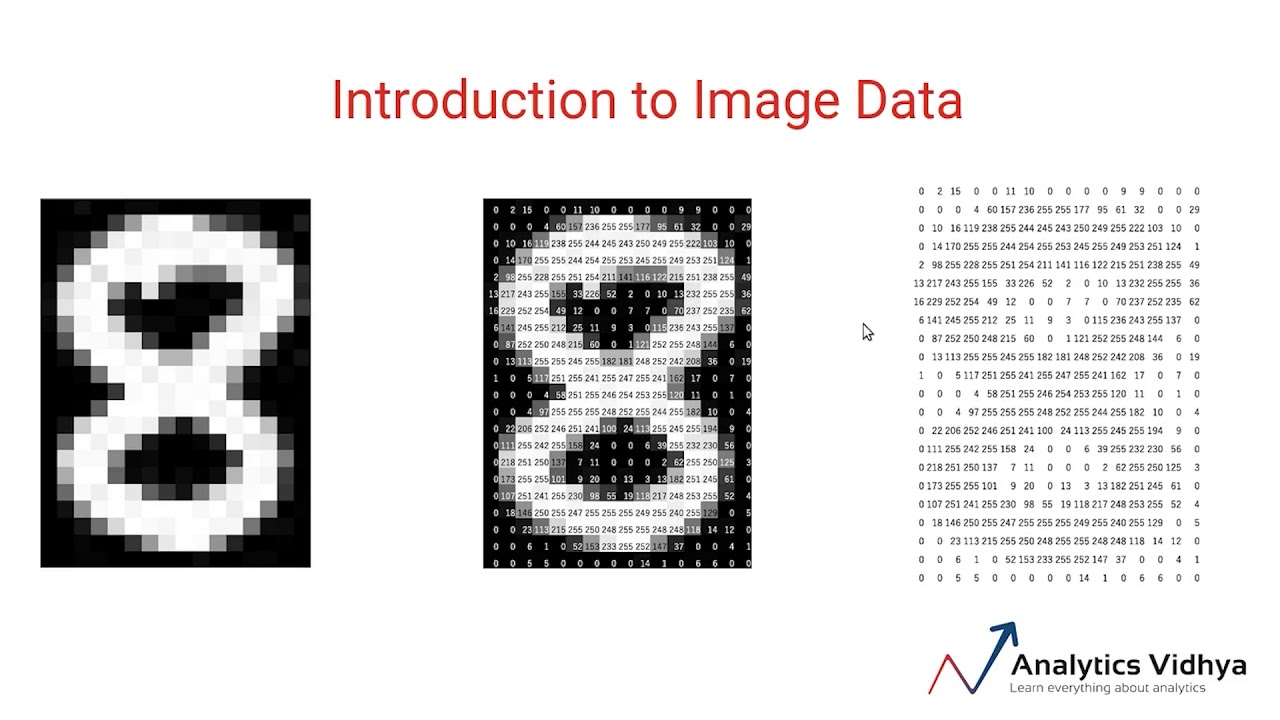

In [ ]:
# Downlaod dataset MNIST dan membaginya menjadi training set dan test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Mengubah bentuk data agar sesuai dengan input yang diharapkan oleh model
X_train = X_train.reshape(-1, 28, 28, 1)  # Mengubah bentuk data training menjadi (jumlah sampel, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)  # Mengubah bentuk data test menjadi (jumlah sampel, 28, 28, 1)
# -1: reshape otomatis menghitung ukuran dimensi berdasarkan dimensi lainnya.
# Jika kita tidak tahu jumlah sampel (contohnya bisa berubah-ubah), kita bisa menulis -1 dan fungsi reshape akan menghitungnya secara otomatis.

# Mengonversi tipe data menjadi float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Mengubah tipe data dari integer menjadi float32.
# Tipe data float digunakan dalam perhitungan karena lebih presisi dibandingkan dengan integer dan diperlukan untuk normalisasi data.

# Normalisasi data agar nilai berada di rentang 0-1
X_train /= 255
X_test /= 255
# Normalisasi: Membagi setiap piksel dengan 255 untuk mengubah rentang nilai piksel dari 0-255 menjadi 0-1.
# Nilai yang lebih kecil membantu stabilitas dan kecepatan konvergensi saat melatih model neural network.
# Nilai 255: nilai maksimum untuk piksel dalam gambar grayscale.

# Mengubah label menjadi bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### **Define and Compile Model**

In [ ]:
# Membuat model ANN (Artificial Neural Network)
model1 = Sequential() # Membuat objek model sekuensial

model1.add(Flatten(input_shape=(28, 28, 1)))  # Layer Flatten untuk mengubah input menjadi vektor 1D

model1.add(Dense(64, activation='relu'))  # Layer Dense dengan 64 neuron dan aktivasi ReLU

model1.add(Dense(10, activation='softmax'))  # Layer output dengan 10 neuron (sesuai jumlah kelas) dan aktivasi softmax

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # Mengompilasi model dengan optimizer Adam, loss function categorical crossentropy, dan metrik akurasi

model1.summary() # Menampilkan arsitektur model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Fit Model**

In [ ]:
# Melatih model dengan data training dan memonitor performa pada data validation
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3909 - acc: 0.8916 - val_loss: 0.2110 - val_acc: 0.9391
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1870 - acc: 0.9463 - val_loss: 0.1670 - val_acc: 0.9522
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1401 - acc: 0.9595 - val_loss: 0.1288 - val_acc: 0.9625
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1133 - acc: 0.9673 - val_loss: 0.1191 - val_acc: 0.9630
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0951 - acc: 0.9727 - val_loss: 0.1016 - val_acc: 0.9692
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0810 - acc: 0.9764 - val_loss: 0.1027 - val_acc: 0.9689
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0703 - acc: 0.9792 - val_loss: 0.0912 - val_acc: 0.9731
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0

### **Evaluation Model**

In [ ]:
# Mengevaluasi model pada data testing
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - acc: 0.9756


[0.0853227898478508, 0.975600004196167]

### **Save and Load Model**

In [ ]:
# Menyimpan model yang sudah dilatih
model1.save('my_model1.keras')

# Memuat model yang sudah disimpan
model_simpan = load_model('my_model1.keras')

### **Visualization**

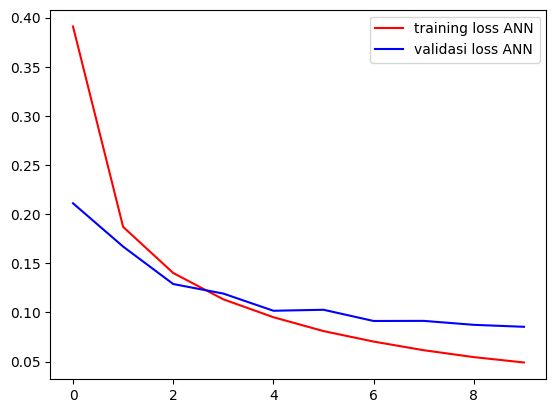

In [ ]:
epochs = range(10)  # Rentang epoch
loss1 = history1.history['loss']  # Loss pada training set
val_loss1 = history1.history['val_loss']  # Loss pada validation set
plt.plot(epochs, loss1, 'r', label='training loss ANN')  # Plot loss training
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')  # Plot loss validation
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

### **Prediction**

In [ ]:
# Membuat prediksi pada data testing
pred = model_simpan.predict(X_test)

# Menampilkan label aktual dan prediksi untuk sampel ke-30
print('label actual:', np.argmax(y_test[30]))
print('label prediction:', np.argmax(pred[30]))

313/313 [==============================] - 1s 2ms/step
label actual: 3
label prediction: 3


# **Convolutional Neural Network (CNN)**

### **Import Library**

In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt


### **Load Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### **Define and Compile Model**

In [ ]:
model2 = Sequential()

model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1568)              0         
                                                                 
 dense_14 (Dense)            (None, 64)               

### **Fit Model**

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
600/600 [==============================] - 49s 80ms/step - loss: 0.2346 - acc: 0.9304 - val_loss: 0.0678 - val_acc: 0.9783
Epoch 2/10
600/600 [==============================] - 48s 80ms/step - loss: 0.0664 - acc: 0.9798 - val_loss: 0.0459 - val_acc: 0.9852
Epoch 3/10
600/600 [==============================] - 35s 58ms/step - loss: 0.0472 - acc: 0.9857 - val_loss: 0.0408 - val_acc: 0.9862
Epoch 4/10
600/600 [==============================] - 34s 57ms/step - loss: 0.0366 - acc: 0.9882 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 5/10
600/600 [==============================] - 39s 65ms/step - loss: 0.0300 - acc: 0.9901 - val_loss: 0.0357 - val_acc: 0.9883
Epoch 6/10
600/600 [==============================] - 37s 61ms/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0303 - val_acc: 0.9890
Epoch 7/10
600/600 [==============================] - 34s 57ms/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0307 - val_acc: 0.9901
Epoch 8/10
600/600 [==============================] - 40s 66ms

### **Evaluation Model**

In [ ]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0314 - acc: 0.9903


[0.031378962099552155, 0.9902999997138977]

### **Save and Load Model**

In [ ]:

model2.save('my_model2.keras')

model_simpan2 = load_model('my_model2.keras')

### **Visualization**

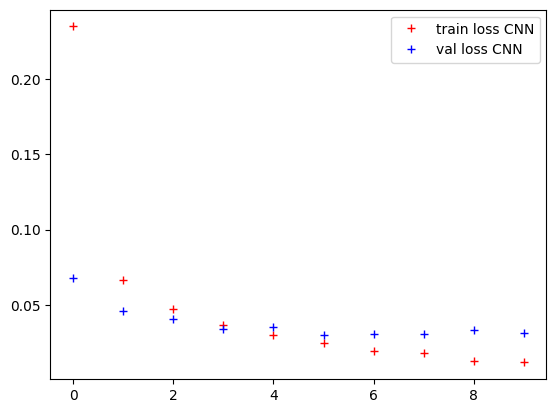

In [ ]:
# Visualisasi hasil training dan validation loss
epochs = range(10)
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs, loss2, 'r+', label='train loss CNN')
plt.plot(epochs, val_loss2, 'b+', label='val loss CNN')
plt.legend()
plt.show()

### **Prediction**

In [ ]:
# Membuat prediksi pada data testing
pred = model_simpan2.predict(X_test)

# Menampilkan label aktual dan prediksi untuk sampel ke-30
print('label actual:', np.argmax(y_test[30]))
print('label prediction:', np.argmax(pred[30]))

313/313 [==============================] - 2s 8ms/step
label actual: 3
label prediction: 3


# Test

In [ ]:
# Import necessary libraries
import keras
from keras.datasets import cifar10  # Dataset CIFAR-10
from keras.utils import to_categorical  # For one-hot encoding
from keras.models import Sequential, load_model  # To create and load models
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D  # Layers for the models
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization


In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to the range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input
ann_model.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
ann_model.add(Dense(256, activation='relu'))  # Fully connected layer with 256 units
ann_model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history_ann = ann_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Save the ANN model
ann_model.save('ann_cifar10.h5')


Epoch 1/10
500/500 [==============================] - 29s 57ms/step - loss: 1.8848 - accuracy: 0.3223 - val_loss: 1.7230 - val_accuracy: 0.3811
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 1.6730 - accuracy: 0.3984 - val_loss: 1.6159 - val_accuracy: 0.4192
Epoch 3/10
500/500 [==============================] - 18s 37ms/step - loss: 1.5898 - accuracy: 0.4297 - val_loss: 1.5325 - val_accuracy: 0.4579
Epoch 4/10
500/500 [==============================] - 20s 39ms/step - loss: 1.5261 - accuracy: 0.4532 - val_loss: 1.5509 - val_accuracy: 0.4505
Epoch 5/10
500/500 [==============================] - 19s 37ms/step - loss: 1.4849 - accuracy: 0.4707 - val_loss: 1.4820 - val_accuracy: 0.4718
Epoch 6/10
500/500 [==============================] - 20s 39ms/step - loss: 1.4514 - accuracy: 0.4818 - val_loss: 1.4911 - val_accuracy: 0.4780
Epoch 7/10
500/500 [==============================] - 21s 43ms/step - loss: 1.4195 - accuracy: 0.4934 - val_loss: 1.4802 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Conv layer with 32 filters
cnn_model.add(MaxPooling2D((2, 2)))  # Max pooling layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))  # Conv layer with 64 filters
cnn_model.add(MaxPooling2D((2, 2)))  # Max pooling layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))  # Conv layer with 64 filters
cnn_model.add(Flatten())  # Flatten the input
cnn_model.add(Dense(64, activation='relu'))  # Fully connected layer with 64 units
cnn_model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Save the CNN model
cnn_model.save('cnn_cifar10.h5')


Epoch 1/10
500/500 [==============================] - 68s 135ms/step - loss: 1.6054 - accuracy: 0.4123 - val_loss: 1.3937 - val_accuracy: 0.4858
Epoch 2/10
500/500 [==============================] - 65s 129ms/step - loss: 1.2754 - accuracy: 0.5439 - val_loss: 1.1918 - val_accuracy: 0.5724
Epoch 3/10
500/500 [==============================] - 65s 131ms/step - loss: 1.1123 - accuracy: 0.6068 - val_loss: 1.0946 - val_accuracy: 0.6098
Epoch 4/10
500/500 [==============================] - 66s 131ms/step - loss: 1.0076 - accuracy: 0.6468 - val_loss: 0.9885 - val_accuracy: 0.6520
Epoch 5/10
500/500 [==============================] - 66s 133ms/step - loss: 0.9261 - accuracy: 0.6756 - val_loss: 0.9768 - val_accuracy: 0.6611
Epoch 6/10
500/500 [==============================] - 62s 123ms/step - loss: 0.8624 - accuracy: 0.7004 - val_loss: 0.8804 - val_accuracy: 0.6938
Epoch 7/10
500/500 [==============================] - 69s 137ms/step - loss: 0.8157 - accuracy: 0.7147 - val_loss: 0.8691 - val_ac

In [ ]:
# Evaluate the ANN model
ann_eval = ann_model.evaluate(X_test, y_test)
print('ANN Test Accuracy:', ann_eval[1])

# Evaluate the CNN model
cnn_eval = cnn_model.evaluate(X_test, y_test)
print('CNN Test Accuracy:', cnn_eval[1])

# Plot the training and validation loss for both models
epochs = range(1, 11)
plt.plot(epochs, history_ann.history['loss'], 'r', label='ANN Training Loss')
plt.plot(epochs, history_ann.history['val_loss'], 'b', label='ANN Validation Loss')
plt.plot(epochs, history_cnn.history['loss'], 'r+', label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], 'b+', label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load and predict with the saved CNN model
model_cnn_saved = load_model('cnn_cifar10.h5')
pred_cnn = model_cnn_saved.predict(X_test)

# Display an example prediction
print('Actual Label:', np.argmax(y_test[30]))
print('Predicted Label:', np.argmax(pred_cnn[30]))
